#          WEATHER FORECAST

#### 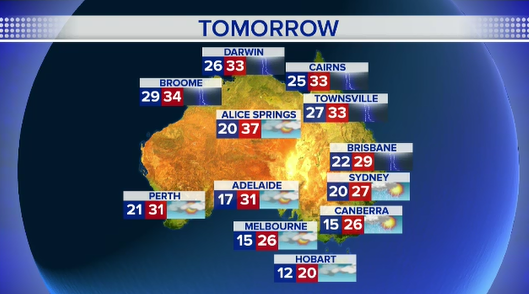

### Rationale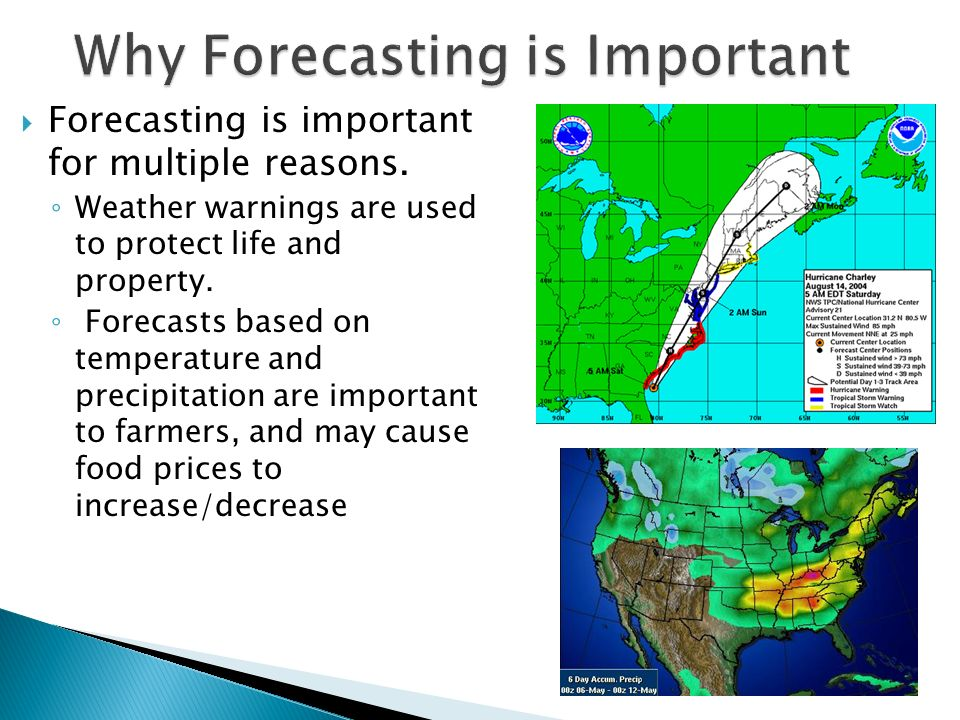

# PRESENTATION REQUIREMENTS
There will be no slides for the presentation, you are just expected to submit your final Notebook upon the assigned deadline.
Your Presentation should be showcased within 5 - 7 minutes
You will receive Q&A session from the judges (optional)

#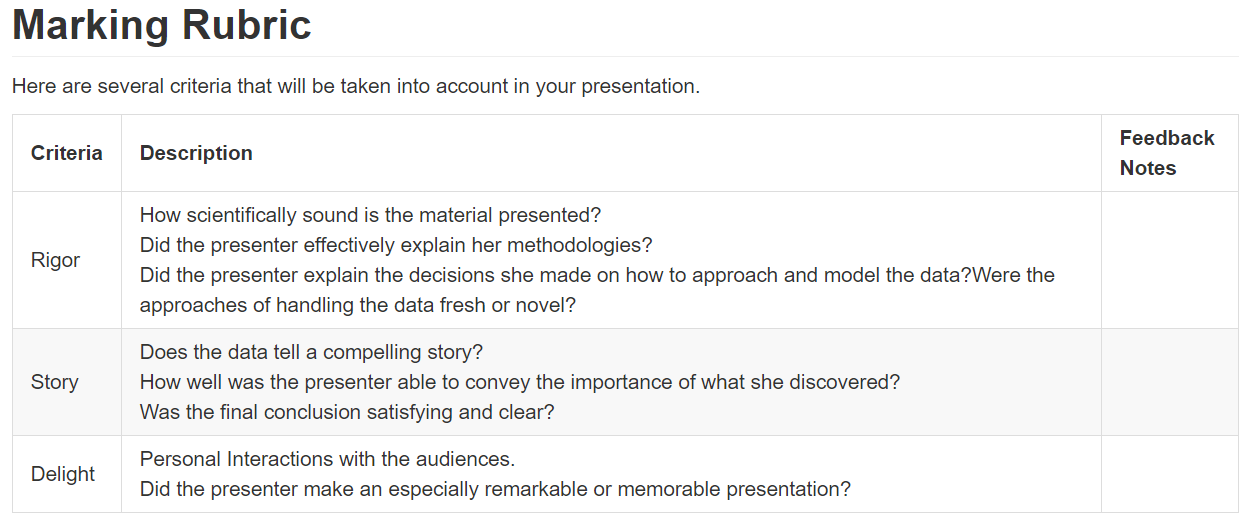

#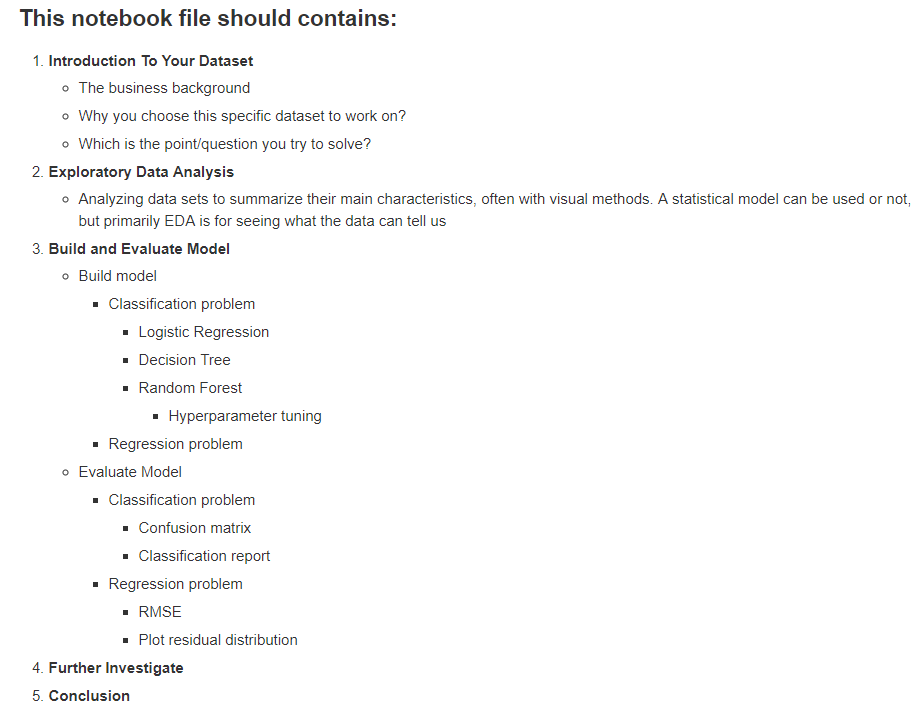

# INTRODUCTION TO DATASET

## 1. Preparing platform

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
#import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score
#%matplotlib inline

## 2. Preparing data

In [12]:
#Reading data file
australia = pd.read_csv('./weatherAUS.csv')
australia.head()
backup_australia=australia

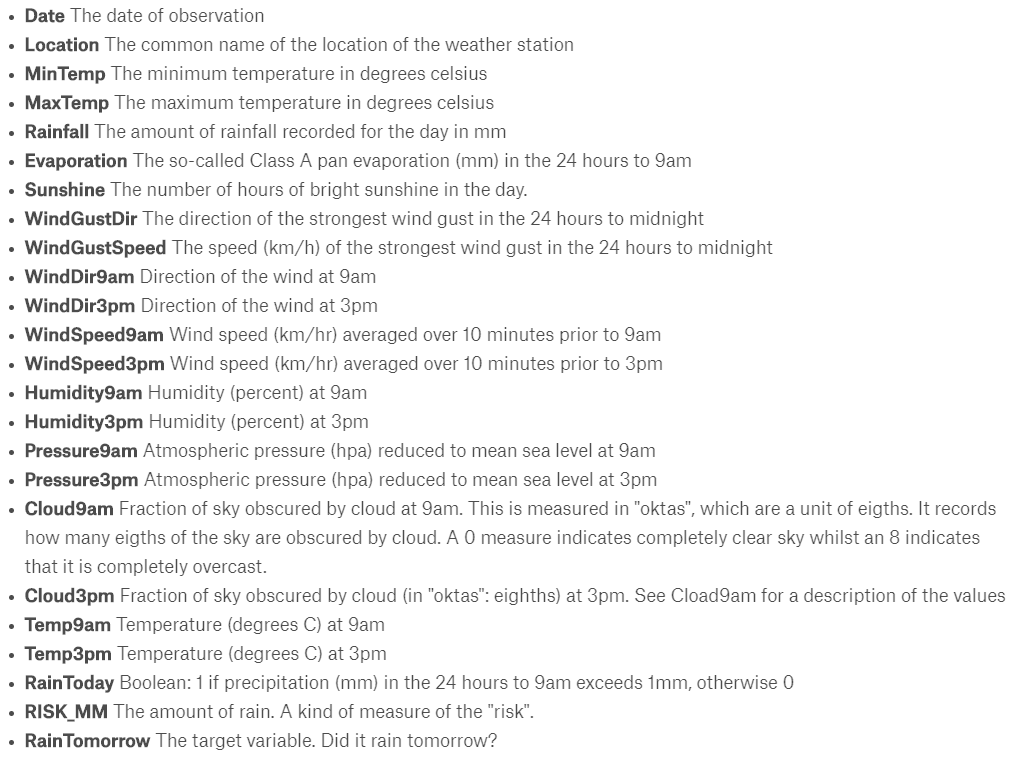

In [13]:
print('Records: ',australia.shape[0],'\n')
print(australia.info())

Records:  142193 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        1

### Check for null values

In [14]:
australia[australia.isnull().any(axis=1)]


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
5       2008-12-06   Albury     14.6     29.7       0.2          NaN   
6       2008-12-07   Albury     14.3     25.0       0.0          NaN   
7       2008-12-08   Albury      7.7     26.7       0.0          NaN   
8       2008-12-09   Albury      9.7     31.9       0.0          NaN   
9       2008-12-10   Albury     13.1     30.1       1.4          NaN   
10      2008-12-11   Albury     13.4     30.4       0.0          NaN   
11      2008-12-12   Albury     15.9     21.7       2.2          NaN   
12      2008-12-13   Albury     15.9     18.6      15.6          NaN   
13      2008-12-14   Albury     12.6     21.0       3.6          NaN   
14      2008-12-16   Albury      9.8     27.7       NaN          NaN   
15      2008-12-17   Albury     14.1     20.9       0.0          NaN   
16      2008-12-18   Albury     13.5     22.9      16.8          NaN   
17      2008-12-19   Albury     11.2     22.5      10.6          NaN   
18      2008-12-20   Albury      9.8     25.6       0.0          NaN   
19      2008-12-21   Albury     11.5     29.3       0.0          NaN   
20      2008-12-22   Albury     17.1     33.0       0.0          NaN   
21      2008-12-23   Albury     20.5     31.8       0.0          NaN   
22      2008-12-24   Albury     15.3     30.9       0.0          NaN   
23      2008-12-25   Albury     12.6     32.4       0.0          NaN   
24      2008-12-26   Albury     16.2     33.9       0.0          NaN   
25      2008-12-27   Albury     16.9     33.0       0.0          NaN   
26      2008-12-28   Albury     20.1     32.7       0.0          NaN   
27      2008-12-29   Albury     19.7     27.2       0.0          NaN   
28      2008-12-30   Albury     12.5     24.2       1.2          NaN   
29      2008-12-31   Albury     12.0     24.4       0.8          NaN   
...            ...      ...      ...      ...       ...          ...   
142163  2017-05-26    Uluru     14.3     27.6       0.4          NaN   
142164  2017-05-27    Uluru      9.3     28.0       0.0          NaN   
142165  2017-05-28    Uluru      8.0     24.6       0.0          NaN   
142166  2017-05-29    Uluru     12.7     22.2       0.0          NaN   
142167  2017-05-30    Uluru      9.4     22.7       0.0          NaN   
142168  2017-05-31    Uluru      5.4     20.5       0.0          NaN   
142169  2017-06-01    Uluru      5.6     19.4       0.0          NaN   
142170  2017-06-02    Uluru      1.5     19.2       0.0          NaN   
142171  2017-06-03    Uluru      3.8     19.8       0.0          NaN   
142172  2017-06-04    Uluru      4.5     18.8       0.0          NaN   
142173  2017-06-05    Uluru      4.9     20.7       0.0          NaN   
142174  2017-06-06    Uluru      1.2     20.8       0.0          NaN   
142175  2017-06-07    Uluru      0.5     21.7       0.0          NaN   
142176  2017-06-08    Uluru      4.0     20.0       0.0          NaN   
142177  2017-06-09    Uluru      3.4     19.8       0.0          NaN   
142178  2017-06-10    Uluru      3.2     18.6       0.0          NaN   
142179  2017-06-11    Uluru      2.4     19.1       0.0          NaN   
142180  2017-06-12    Uluru      5.1     19.7       0.0          NaN   
142181  2017-06-13    Uluru      2.5     21.2       0.0          NaN   
142182  2017-06-14    Uluru      2.3     21.4       0.0          NaN   
142183  2017-06-15    Uluru      2.6     22.5       0.0          NaN   
142184  2017-06-16    Uluru      5.2     24.3       0.0          NaN   
142185  2017-06-17    Uluru      6.4     23.4       0.0          NaN   
142186  2017-06-18    Uluru      8.0     20.7       0.

#### Dropping unsued variables

In [15]:
australia  = australia.drop(['Location','Date','Evaporation','Sunshine', 'Cloud9am','Cloud3pm',
                           'WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am',
                           'WindSpeed3pm'], axis=1)

In [137]:
australia.head()

MinTemp  MaxTemp  Rainfall  Humidity9am  Humidity3pm  Pressure9am  \
0     13.4     22.9       0.6         71.0         22.0       1007.7   
1      7.4     25.1       0.0         44.0         25.0       1010.6   
2     12.9     25.7       0.0         38.0         30.0       1007.6   
3      9.2     28.0       0.0         45.0         16.0       1017.6   
4     17.5     32.3       1.0         82.0         33.0       1010.8   

   Pressure3pm  Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  
0       1007.1     16.9     21.8        No      0.0           No  
1       1007.8     17.2     24.3        No      0.0           No  
2       1008.7     21.0     23.2        No      0.0           No  
3       1012.8     18.1     26.5        No      1.0           No  
4       1006.0     17.8     29.7        No      0.2           No

# EXPLORATORY DATA ANALYSIS

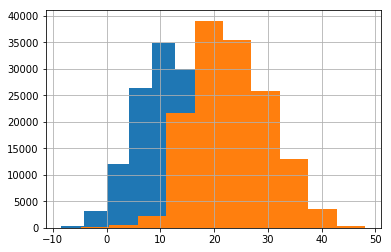

In [76]:
australia['MinTemp'].hist()
australia['MaxTemp'].hist()

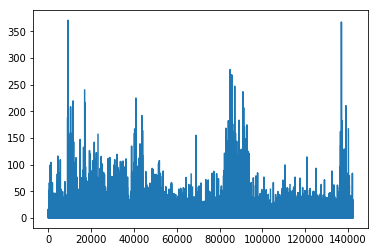

In [77]:
australia['Rainfall'].plot()

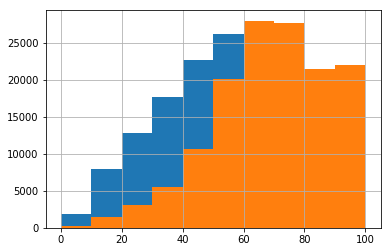

In [78]:
australia['Humidity3pm'].hist()
australia['Humidity9am'].hist()


Rain:  110316
Not Rain :  31877


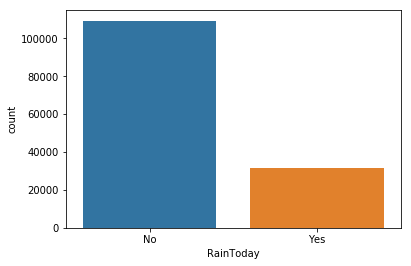

In [131]:
sns.countplot(australia['RainToday'])
print('Rain: ',Rain)
print('Not Rain : ',NotRain)

Rain:  110316
Not Rain :  31877


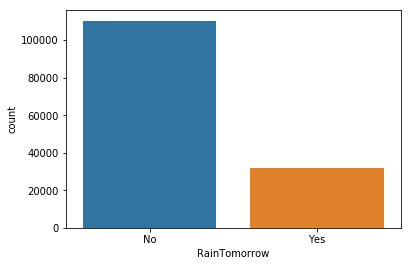

In [130]:
sns.countplot(australia['RainTomorrow'])
print('Rain: ',Rain)
print('Not Rain : ',NotRain)

In [30]:
# Changing boolen values and handling NaN values
australia = australia.replace({'No':0, 'Yes':1})
australia = australia.fillna(0)


In [139]:
australia.head()

MinTemp  MaxTemp  Rainfall  Humidity9am  Humidity3pm  Pressure9am  \
0     13.4     22.9       0.6         71.0         22.0       1007.7   
1      7.4     25.1       0.0         44.0         25.0       1010.6   
2     12.9     25.7       0.0         38.0         30.0       1007.6   
3      9.2     28.0       0.0         45.0         16.0       1017.6   
4     17.5     32.3       1.0         82.0         33.0       1010.8   

   Pressure3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  
0       1007.1     16.9     21.8        0.0      0.0             0  
1       1007.8     17.2     24.3        0.0      0.0             0  
2       1008.7     21.0     23.2        0.0      0.0             0  
3       1012.8     18.1     26.5        0.0      1.0             0  
4       1006.0     17.8     29.7        0.0      0.2             0

## Data Visualization

In [37]:
# Concatenate the target frame with just 20 columns from corpus_scaled
#X_plot = pd.concat([Y, X_scaled], axis=1) 
X_plot = pd.concat([Y, X_scaled.iloc[:,0:20]], axis=1) 

# Reshaping the frame
X_plot = pd.melt(X_plot, id_vars="RainTomorrow", var_name="Features", value_name='Values')
X_plot.head()

RainTomorrow Features    Values
0           No  MinTemp  0.196908
1           No  MinTemp -0.734690
2           No  MinTemp  0.119275
3           No  MinTemp -0.455211
4           No  MinTemp  0.833499

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

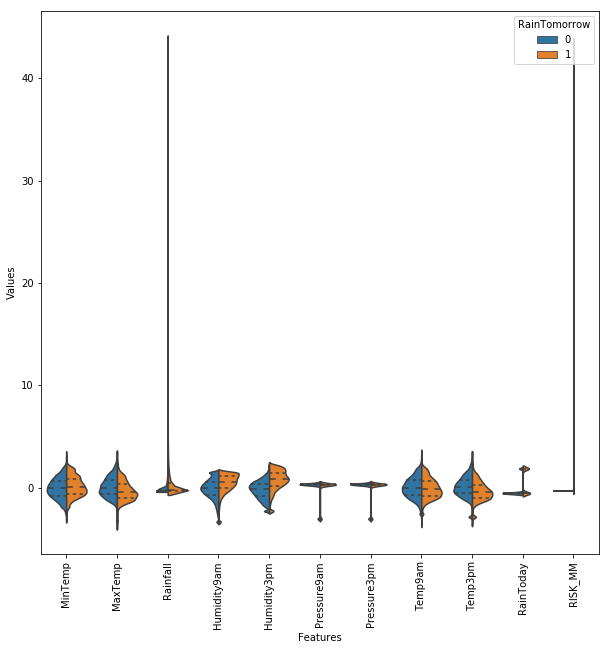

In [13]:
#Violin Plot

# Setting the plt object
plt.figure(figsize=(10,10))
# Setting the violinplot objetc with respecitve atributes
sns.violinplot(x="Features", y="Values", hue="RainTomorrow", data=X_plot, split=True, inner="quart")
# Rotation of x ticks
plt.xticks(rotation=90)

C:\Users\Quan\Anaconda3_2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


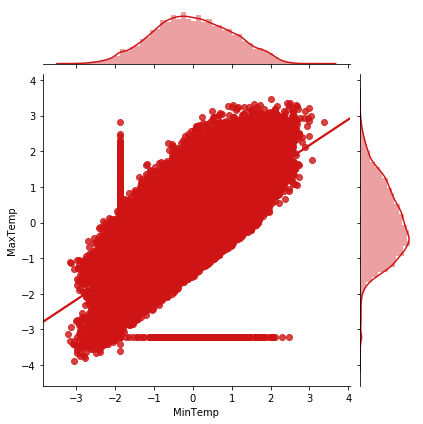

In [30]:
# Joint plot
# Correlation is taken from Pearsonr value, 1 is totally correlated.
sns.jointplot(X_scaled.loc[:,'MinTemp'], 
              X_scaled.loc[:,'MaxTemp'], kind="regg", color="#ce1414")

### Correlation Matrix

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text xticklabel objects>)

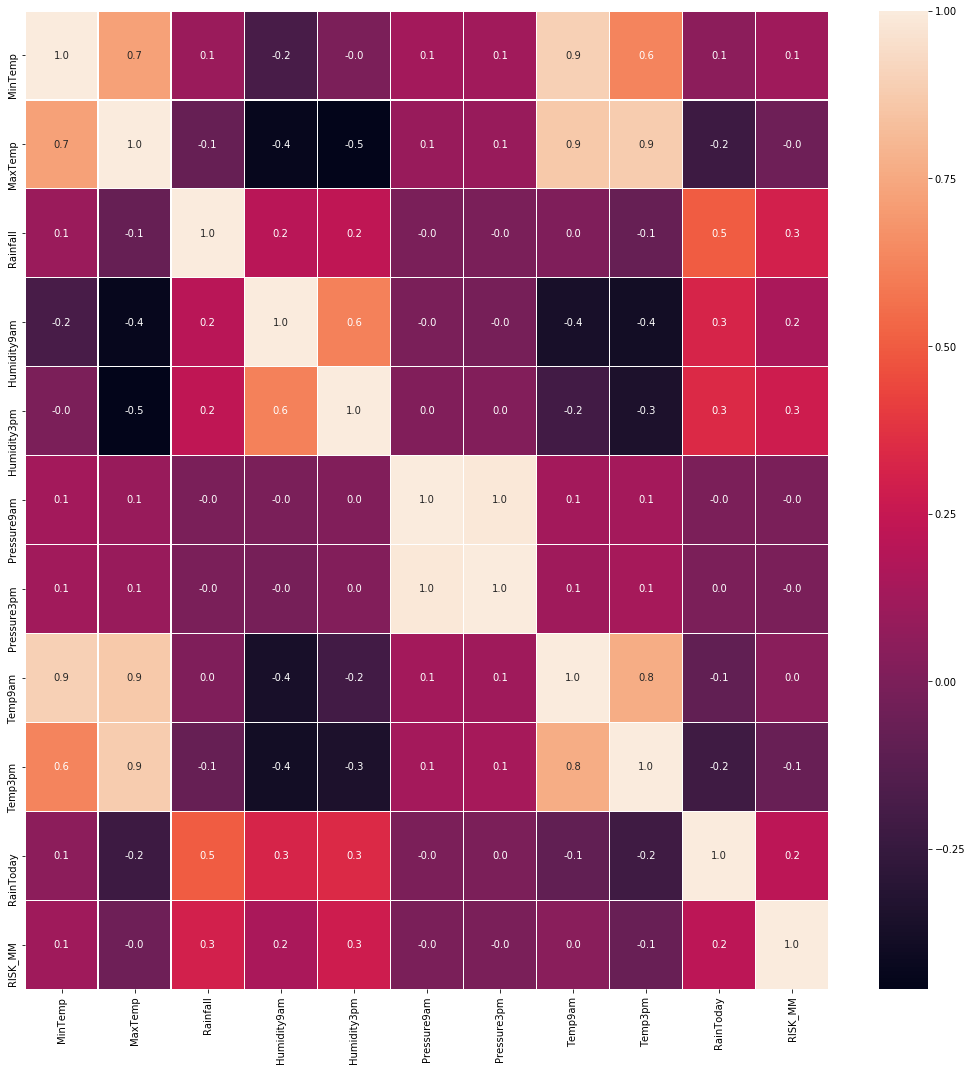

In [86]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_scaled.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(rotation=90)

# BUILD AND EVALUATING MODELS

## Preparing train and test data

In [31]:
X = australia.drop(columns=['RainTomorrow'])
y = australia['RainTomorrow']

In [32]:
# Splitting train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## MODEL 1: LOGISTIC REGRESSION

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

model_logit = LogisticRegression()


### Step 1 - Characteristics of train variables

In [26]:
X_train.describe()

MinTemp       MaxTemp      Rainfall   Humidity9am   Humidity3pm  \
count  99082.000000  99313.000000  98560.000000  98288.000000  97006.000000   
mean      12.202243     23.243175      2.348208     68.826449     51.474115   
std        6.400212      7.120178      8.481632     19.059134     20.833958   
min       -8.500000     -4.800000      0.000000      0.000000      0.000000   
25%        7.600000     17.900000      0.000000     57.000000     36.000000   
50%       12.000000     22.600000      0.000000     70.000000     52.000000   
75%       16.900000     28.300000      0.800000     83.000000     66.000000   
max       33.900000     48.100000    371.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm       Temp9am       Temp3pm       RISK_MM  
count  89715.000000  89736.000000  98902.000000  97628.000000  99535.000000  
mean    1017.633815   1015.239774     17.006213     21.701801      2.359960  
std        7.120679      7.049841      6.492300      6.943141      8.553644  
min      980.500000    978.200000     -7.200000     -5.400000      0.000000  
25%     1012.900000   1010.400000     12.300000     16.600000      0.000000  
50%     1017.600000   1015.200000     16.700000     21.100000      0.000000  
75%     1022.400000   1020.000000     21.600000     26.400000      0.800000  
max     1040.900000   1039.600000     40.200000     46.700000    371.000000

### Step 2 - Model development

In [34]:
model_logit=model_logit.fit(X_train,y_train)

In [36]:
model_logit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Calibration of logistic model

#### Model performance

In [56]:
# Now apply those above metrics to evaluate your model
predictions = model_logit.predict(X_train)

In [57]:
print('Accuracy:',accuracy_score(y_train,predictions))

Accuracy: 0.9969960315466921


In [58]:
print('Confusion matrix of y vs Prediction:\n',confusion_matrix(y_train,predictions))
print('classification report:\n',classification_report(y_train,predictions))


Confusion matrix of y vs Prediction:
 [[77079   152]
 [  147 22157]]
classification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     77231
          1       0.99      0.99      0.99     22304

avg / total       1.00      1.00      1.00     99535



#### Area under the curve for train set

In [75]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [83]:
confusion_matrix(model_logit.predict(X_train),y_train)
##Computing false and true positive rates
fpr,tpr,_=roc_curve(model_logit.predict(X_train),y_train,drop_intermediate=False)

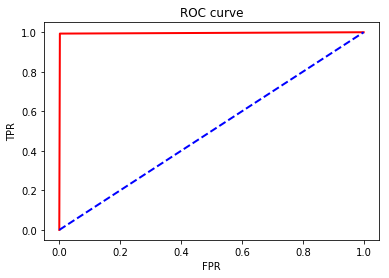

In [85]:
import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [87]:
roc_auc_score(model_logit.predict(X_train),y_train)

0.9956415511505732

#### Area under the curve for test set

In [90]:
confusion_matrix(model_logit.predict(X_test),y_test)
##Computing false and true positive rates
fpr,tpr,_=roc_curve(model_logit.predict(X_test),y_test,drop_intermediate=False)

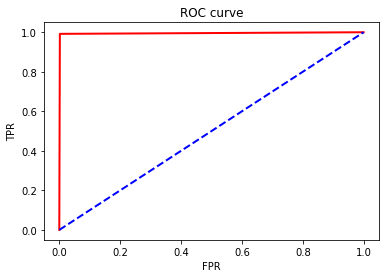

In [91]:
import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [92]:
roc_auc_score(model_logit.predict(X_test),y_test)

0.9949954058617363

## MODEL 1: RANDOM FOREST

### Algorithms: Classification 

### Creating model

In [93]:
model_random = RandomForestClassifier(random_state=23)      
model_random = model_random.fit(X_train,y_train)

### Evaluation

In [94]:
y_predict = model_random.predict(X_test)
accuracy = accuracy_score(y_test, y_predict )
print('Accuracy: ', accuracy)


Accuracy:  0.9999531154765812


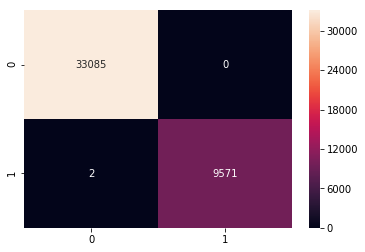

In [95]:
conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot=True, fmt="d")

### Calibration of random forest model

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
predictions = model_random.predict(X)
print('Accuracy:',accuracy_score(y,predictions))

Accuracy: 0.9999859346100018


In [70]:
print('Confusion matrix of y vs Prediction:\n',confusion_matrix(y,predictions))

Confusion matrix of y vs Prediction:
 [[110316      0]
 [     2  31875]]


In [96]:
print('classification report:\n',classification_report(y,predictions))

classification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00    110316
          1       1.00      1.00      1.00     31877

avg / total       1.00      1.00      1.00    142193



#### Area under the curve for random forest

In [99]:
confusion_matrix(model_random.predict(X_test),y_test)
##Computing false and true positive rates
fpr,tpr,_=roc_curve(model_random.predict(X_test),y_test,drop_intermediate=False)

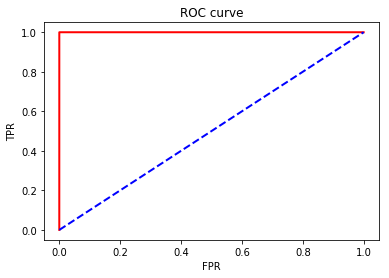

In [101]:
import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [102]:
roc_auc_score(model_random.predict(X_test),y_test)

0.9999697766494394

In [ ]:
### Export model to pickle

In [72]:
import pickle
import os

pickle.dump(model, open(os.path.join('../Weather focast/', 'RandomForest.pkl'), 'wb'), protocol=4)

# CONCLUSION

### Performance of the models are good
#### Accuracy of logistic regression: 0.9976
#### Accuracy of random forest:  0.9999

### Application


#### Random forest model and logistic model should be a method of choice when building-up a predictive model for weather forecast  in daily use

#### Need external validation at different countries
#### Need to build the application for importing data and make prediction
#### Need to publish paper before using in reality

### 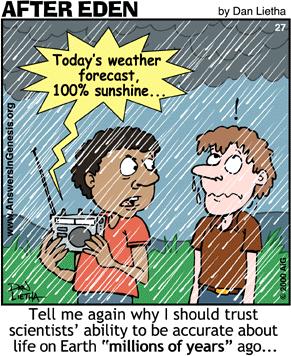